# Glucose Model

    In this lab, we examine an ill-conditioned problem with this type of behavior. Ackerman studied a model of the blood regulatory system to improve the ability of the GTT (glucose tolerance test) to detect pre-diabetics and mild diabetics. 

Consider $g(t)$ the concentration of blood glucose and $h(t)$ the net hormonal concentration.

Also, $c_1,c_2,c_3 \leq 0, c4 \geq 0 $. For diabets, $c_4 = 0$ is a good assumption.


$$g'(t) = c_1g(t) + c_2h(t)$$
$$h'(t) = c_4g(t) + c_4h(t)$$

We'll try to find the insulin level, $u(t)$ which will minimize the difference between $g$ and the desired level $l$.  

### Problem 

$$ \min_u \int_0^T A(g(t) - l)^2 + u(t)^2 dt,$$

$$ g'(t) = -ag(t) - bh(t), g(0) = g_{0} > 0,$$

$$h'(t) = - cg(t) + u(t), h(0) = 0,$$

$$a,b,c > 0, A \geq 0 $$

##### importing modules

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode = True)

In [2]:
g, h, u, l1, l2, A, l, a, b, c = sp.symbols('g h u l1 l2 A l a b c')
H = - A*(g - l)**2 - u**2 + l1*(-a*g - b*h) + l2*(-c*g + u)

### State Conditions

In [3]:
sp.diff(H,l1), sp.diff(H,l2)

### Adjoint Conditions

In [4]:
dl1 = (-1)*sp.diff(H,g)
dl2 = (-1)*sp.diff(H,h)
dl1, dl2

### Control Conditions

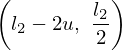

In [5]:
du = sp.diff(H,u)
U = l2/2
du,U

In [6]:
from optimal_control_class import OptimalControl as OC

Iteration 1
The minimum is -0.17157377613408334
Iteration 2
The minimum is -0.0006352190786600292
Iteration 3
The minimum is -0.00031627144800827546
Iteration 4
The minimum is -0.00015682955398007957
Iteration 5
The minimum is -7.712456442003593e-05
Iteration 6
The minimum is -3.728004676996946e-05
Iteration 7
The minimum is -1.736177571153654e-05
Iteration 8
The minimum is -7.4046336665121984e-06
Iteration 9
The minimum is -2.427059186581675e-06
Iteration 10
The minimum is 6.122988183053933e-08


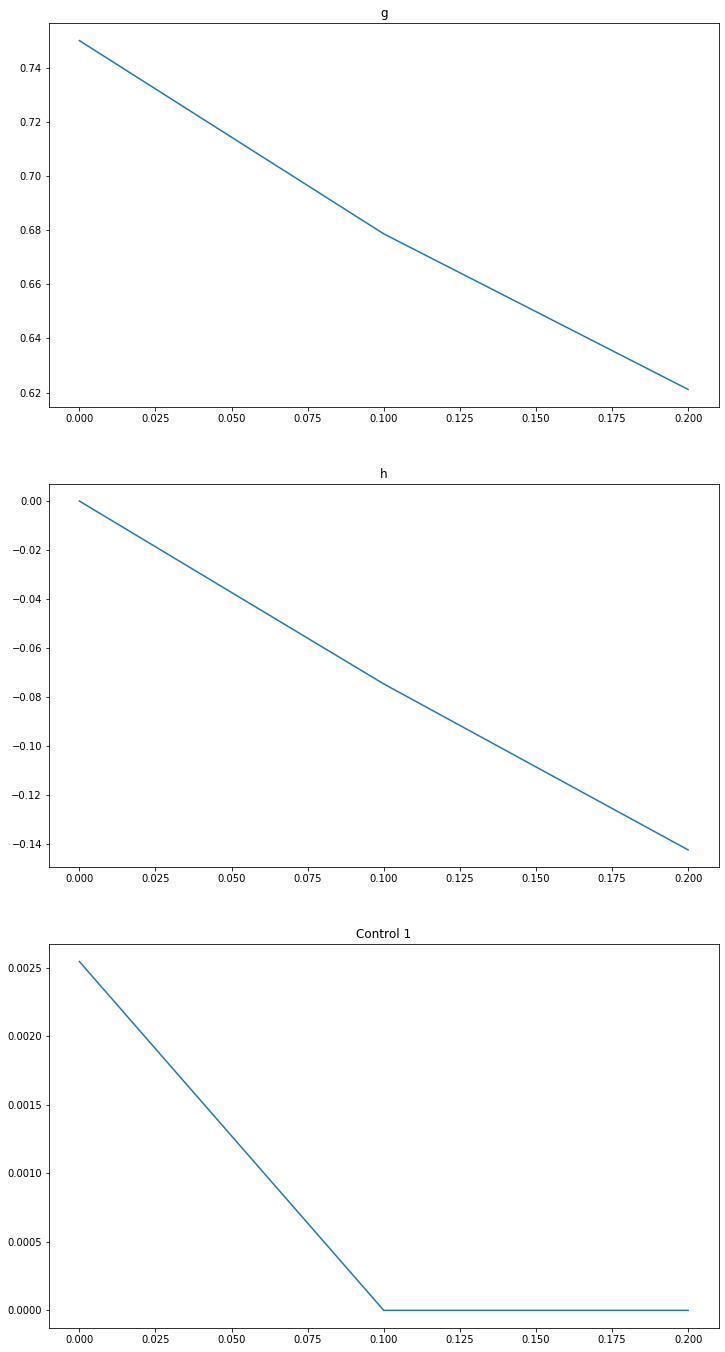

In [7]:
sX = list(sp.symbols('g h'))
sAdj = list(sp.symbols('l1 l2'))
sU = [sp.symbols('u')]
sConst = list(sp.symbols('A l a b c'))
fU = [sAdj[1]/2]
T = 0.2
final = [0,0]
initial = [0.75,0]
const = [2,0.5,1,1,1]
Problem = OC(H, sX, sAdj, sU, fU, sConst, const, T, initial, final)

X, U = Problem.plot('g','h')